Unioninkatu


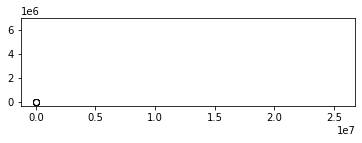

In [24]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

def clean_names(names):
    # strip and removal of duplicates
    return set([name.strip() for name in names])


gdf = geopandas.read_file("regions/v2020.gpkg")
station_data = pd.read_csv("../Downloads/tellingit_2017-2021.csv", sep=';', decimal=',')
station_names = clean_names(station_data[station_data['year'] == 2020]['name'].unique())
station_ids = station_data[station_data['year'] == 2020]['id'].unique()

names_ids = {}

for ids in station_ids:
    name = station_data[station_data['id'] == ids].iloc[0]['name']
    names_ids[ids] = name

print(names_ids[11])
station_gdf = geopandas.GeoDataFrame(
    station_data, geometry=geopandas.points_from_xy(pd.to_numeric(station_data.x), pd.to_numeric(station_data.y))
)
ax = station_gdf.plot(color='white', edgecolor='black')




KeyboardInterrupt: 

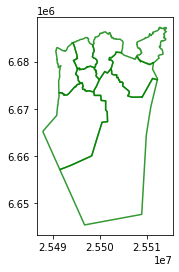

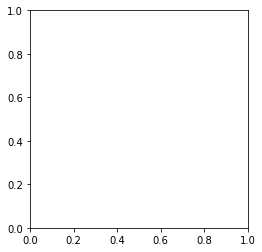

In [51]:
station_gdf.crs = "EPSG:3879"
gdf.boundary.plot(color='green', alpha=0.8)
station_gdf.plot(marker='*', markersize=5)

In [43]:

print(gdf.crs)

epsg:3879


In [49]:


print(gdf.head(10))

    id                     name          x          y                 time  \
0   70          Sammonpuistikko  24.922411  60.173150  2017/05/09 09:00:03   
1   71          Hietaniemenkatu  24.910316  60.173035  2017/05/09 09:00:03   
2   72  Eteläinen Hesperiankatu  24.916021  60.175632  2017/05/09 09:00:03   
3   73                 Kesäkatu  24.913250  60.179300  2017/05/09 09:00:03   
4   74            Rajasaarentie  24.911127  60.183136  2017/05/09 09:00:03   
5  120              Mäkelänkatu  24.963560  60.189636  2017/05/09 09:00:03   
6   88                Kiskontie  24.901300  60.198940  2017/05/09 09:00:03   
7  121         Vilhonvuorenkatu  24.967873  60.186462  2017/05/09 09:00:03   
8    1              Kaivopuisto  24.950392  60.155410  2017/05/09 09:00:03   
9   89             Tilkanvierto  24.899261  60.197533  2017/05/09 09:00:03   

   yday  year                          geometry  
0   129  2017  POINT (25495693.178 6673366.641)  
1   129  2017  POINT (25495021.790 667335